In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import cluster
from sklearn.decomposition import PCA

In [4]:
np.random.seed(100)
np.random.normal(loc = 1000, scale = 100, size = 50)

array([ 825.02345269, 1034.26804033, 1115.30358026,  974.75639635,
       1098.1320787 , 1051.42188414, 1022.11796692,  892.99566694,
        981.05041692, 1025.50014443,  954.19730145, 1043.51634881,
        941.64049497, 1081.68470717, 1067.27208057,  989.55888566,
        946.87196231, 1102.97326851,  956.18643773,  888.16817537,
       1161.89816607, 1154.16051745,  974.81208608,  915.75642617,
       1018.45186906, 1093.70822011, 1073.10003438, 1136.15561251,
        967.37619408, 1005.56760149, 1022.23996086,  855.67830048,
        924.36476944, 1081.6454011 , 1075.04447615,  954.40530725,
       1118.9622268 ,  830.93831736,  864.36009511,  876.75654861,
        945.55608383,  933.18282632, 1000.73145632,  938.70612645,
       1129.97480748,  826.69043763,  901.66899009, 1035.75077532,
        838.64214972, 1147.07138666])

In [131]:
# In this example we will simulate customer data (age and income)

#set random seed to 100 so that you get the same "random" output as in this Jupyter notebook
np.random.seed(100)

#initialize an empty dataframe
df = pd.DataFrame()

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 
# loc: mean; scale: standard deviation; size: number of random values

df['income'] = np.random.normal(50000,10000,100)
df['age'] = np.random.normal(40,10,100)
# convert the values in the dataframe to integers to get whole numbers
df = df.astype(int)
df.head()

,income,age
0,32502,22
1,53426,28
2,61530,10
3,47475,40
4,59813,37


In [132]:
df['age'].std()

10.646624162644516

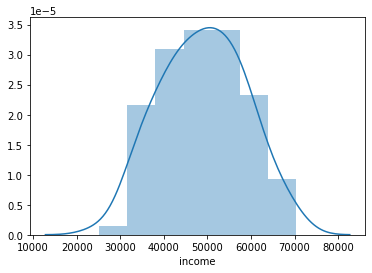

In [133]:
# check the distribution of income
sns.distplot(df['income'])

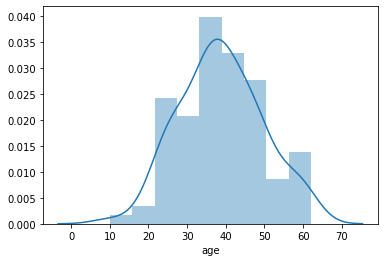

In [134]:
# check the distribution of age
sns.distplot(df['age'])

In [135]:
df['age'].mean()

38.77

In [136]:
# standardize both income and age

df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()
df.head()

,income,age,z_age
0,32502,22,-1.575147
1,53426,28,-1.011588
2,61530,10,-2.702265
3,47475,40,0.115530
4,59813,37,-0.166250


In [137]:
df['z_income'] = (df['income'] - df['income'].mean())/df['income'].std()
df['z_age'].mean()

-3.219646771412954e-16

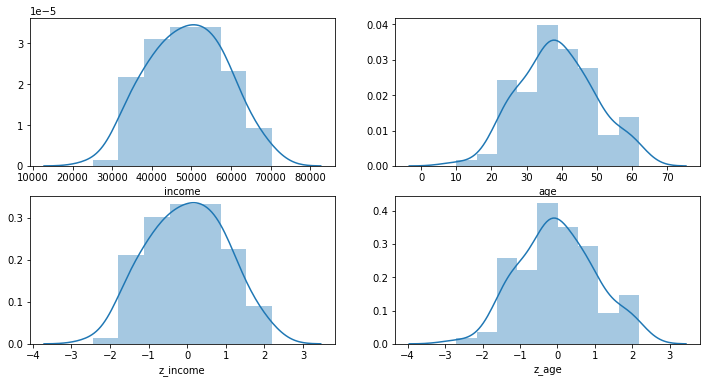

In [138]:
# put all 4 plots on one graph
# https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

# notice that the raw data preserves its distribution shape after standardization

fig, ax = plt.subplots(2,2, figsize = (12,6))

sns.distplot(df['income'], ax = ax[0,0])
sns.distplot(df['age'], ax = ax[0,1])
sns.distplot(df['z_income'], ax = ax[1,0])
sns.distplot(df['z_age'], ax = ax[1,1])

## <font color='firebrick'> Calculating distance

In [139]:
x = [4, 5, 6, 7, 8]
[print(i) for i in x]

4
5
6
7
8


[None, None, None, None, None]

In [140]:
[i**2 for i in x]

[16, 25, 36, 49, 64]

In [141]:
[i for i in range(4)]

[0, 1, 2, 3]

In [142]:
[i for i in range(10) if i%2 == 0]

[0, 2, 4, 6, 8]

In [143]:
[i for i in range(10) if i%2 == 0 and i>5]

[6, 8]

In [144]:
# multiple output 
['four' if i ==4 else i for i in range(10)]

[0, 1, 2, 3, 'four', 5, 6, 7, 8, 9]

In [145]:
# multiple output 
[('four' if i ==4 else ('six' if i ==6 else i)) for i in range(10)]

[0, 1, 2, 3, 'four', 5, 'six', 7, 8, 9]

In [146]:
ages = [40, 35, 30]
incomes = [40000, 30000, 45000]

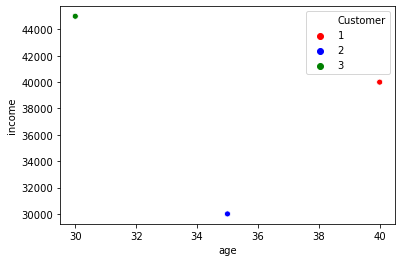

In [147]:
data = pd.DataFrame({'Customer': [1,2,3],
                    'age': ages,
                    'income': incomes})

sns.scatterplot(data = data, x = 'age', y='income', hue = 'Customer',
               palette = {1:'red',2:'blue',3:'green'})

In [148]:
data

,Customer,age,income
0,1,40,40000
1,2,35,30000
2,3,30,45000


In [149]:
# distance between customer 1 and 2
d12 = math.sqrt((ages[0]-ages[1])**2 + (incomes[0]-incomes[1])**2)
# distance between customer 1 and 3
d13 = math.sqrt((ages[0]-ages[2])**2 + (incomes[0]-incomes[2])**2)
# distance between customer 2 and 3
d23 = math.sqrt((ages[1]-ages[2])**2 + (incomes[1]-incomes[2])**2)


In [150]:
print("Customer 1&2:",d12,
     "\nCustomer 1&3:", d13,
     "\nCustomer 2&3:",d23)

Customer 1&2: 10000.001249999921 
Customer 1&3: 5000.00999999 
Customer 2&3: 15000.00083333331


Before standardization, we see the customers 1 and 3 are the most similar. Let' see if this will be the case after standardization. 

#### Computing Similarities between customers (with standardization)

In [151]:
ages = pd.Series([40,35,30])
income = pd.Series([50000,30000,45000])

z_ages = [(i - ages.mean())/ages.std() for i in ages]
z_income = [(i - income.mean())/income.std() for i in income]

df  = pd.DataFrame({'Customer': [1,2,3], 'age':ages, 'income':income, 'z_ages':z_ages, 'z_income':z_income})
df

,Customer,age,income,z_ages,z_income
0,1,40,50000,1.0,0.800641
1,2,35,30000,0.0,-1.120897
2,3,30,45000,-1.0,0.320256


In [152]:
# distance between customer 1 and 2

z_d12 = math.sqrt((z_ages[0] - z_ages[1])**2 + (z_income[0] - z_income[1])**2)

# distance between customer 1 and 3

z_d13 = math.sqrt((z_ages[0] - z_ages[2])**2 + (z_income[0] - z_income[2])**2)

# distance between customer 2 and 3

z_d23 = math.sqrt((z_ages[1] - z_ages[2])**2 + (z_income[1] - z_income[2])**2)

In [153]:
print('Customer 1&2:',z_d12,
     '\nCustomer 1&3:',z_d13,
     '\nCustomer 2&3:',z_d23)

Customer 1&2: 2.1661735138967266 
Customer 1&3: 2.0568833780186058 
Customer 2&3: 1.7541160386140584


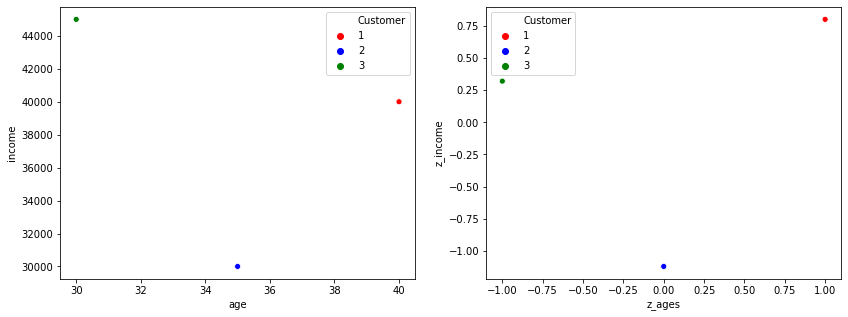

In [154]:
# let's compare distance vs. standardized distances 

fig, ax = plt.subplots(1,2, figsize = (14,5))

sns.scatterplot(data = data, x = 'age', y='income', hue = 'Customer',
               palette = {1:'red',2:'blue',3:'green'}, ax = ax[0])

sns.scatterplot(data = df, x = 'z_ages', y='z_income', hue = 'Customer',
               palette = {1:'red',2:'blue',3:'green'}, ax = ax[1])

With standardization, we notice that customers 2 & 3 are more similar compared to 1 & 2, 1  & 3.

In [155]:
dist = pd.DataFrame({'Distance': pd.Series([d12, d13, d23]),
'Standardized Distance': pd.Series([z_d12, z_d13, z_d23])})
dist.index = ['1 & 2', '1 & 3', '2 & 3']
dist

,Distance,Standardized Distance
1 & 2,10000.001250,2.166174
1 & 3,5000.010000,2.056883
2 & 3,15000.000833,1.754116


In [156]:
data = pd.read_csv('customer_interactions.csv')

In [157]:
data['spend'] = pd.Series(data['spend'])
data['interactions'] = pd.Series(data['interactions'])

In [158]:
data['z_spend'] = (data['spend'] - data['spend'].mean())/data['spend'].std()
data['z_interactions'] = (data['interactions'] - data['interactions'].mean())/data['interactions'].std()
data.head()

,spend,interactions,z_spend,z_interactions
0,5818,23,0.923351,0.647282
1,6255,15,1.145958,-0.809740
2,6139,15,1.086868,-0.809740
3,6070,19,1.051719,-0.081229
4,4837,24,0.423632,0.829410


In [159]:
# get a sample of 3 customers

new = data.sample(3, random_state = 100).reset_index()
new

,index,spend,interactions,z_spend,z_interactions
0,249,3144,20,-0.438778,0.100899
1,353,3330,25,-0.344030,1.011538
2,537,2615,26,-0.708249,1.193666


In [160]:
# distance between customer 1 and 2
d12 = math.sqrt((new.loc[0,'z_spend'] - new.loc[1,'z_spend'])**2 + (new.loc[0,'z_interactions'] - new.loc[1,'z_interactions'])**2)

# distance between customer 1 and 3

d13 = math.sqrt((new.loc[0,'z_spend'] - new.loc[2,'z_spend'])**2 + (new.loc[0,'z_interactions'] - new.loc[2,'z_interactions'])**2)

# distance between customer 2 and 3

d23 = math.sqrt((new.loc[1,'z_spend'] - new.loc[2,'z_spend'])**2 + (new.loc[1,'z_interactions'] - new.loc[2,'z_interactions'])**2)


In [161]:
print('Customer 1&2:',d12,
     '\nCustomer 1&3:',d13,
     '\nCustomer 2&3:',d23)


Customer 1&2: 0.915554870633757 
Customer 1&3: 1.1255017901324251 
Customer 2&3: 0.4072175989496995


In [162]:
# read ageinc.csv data

data = pd.read_csv('ageinc.csv')
data.sample(2)

,income,age
157,39522,35
250,55978,27


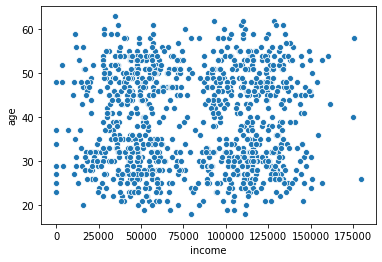

In [163]:
# let's create a scatterplot for income and age

sns.scatterplot(data=data, x='income',y='age')

In [164]:
# In order to run k-means clustering, we need to standardize the numerical data

data['z_income'] = (data['income'] - data['income'].mean())/data['income'].std()
data['z_age'] = (data['age'] - data['age'].mean())/data['age'].std()

data.sample(2)

,income,age,z_income,z_age
643,3384,52,-1.954362,1.146963
176,102206,47,0.562605,0.691458


In [165]:
# let's check if the standardization is computed correctly
# we expect the mean of z_income and z_age to be 0, 
# we expect the standard deviation for z_income and z_age to be 1

data[['z_income','z_age']].mean()

z_income    2.842171e-17
z_age       2.906009e-16
dtype: float64

In [166]:
data[['z_income','z_age']].std()

z_income    1.0
z_age       1.0
dtype: float64

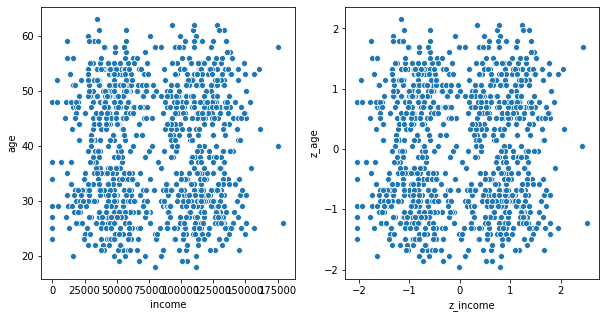

In [167]:
# let's check the scatter plot for the standardized data 
# we see that standardization did not change the structure of the data

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.scatterplot(data=data, x= 'income', y='age', ax=ax[0])
sns.scatterplot(data=data, x= 'z_income', y='z_age', ax=ax[1])

In [171]:
# run k-means clustering

# create a k-means model with 4 clusters (the random_state is needed so that 
# everyone gets the same answer in this notebook because Kmeans clustering is 
# not deterministic). The initial assingment of points as centroids is done randomly
model = cluster.KMeans(n_clusters = 4, random_state = 10)

#fit the created k-means model to our data
model.fit(data[['z_income','z_age']])

KMeans(n_clusters=4, random_state=10)

In [172]:
# the model fit has an attribute called 'labels_' which stores 
# a number that represents the cluster of each point in the dataset
# since we created a k-means model with k=4 (n_clusters), then we will 
# see labels 0, 1, 2, and 3.
model.labels_

array([0, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 0, 0, 2, 3, 3, 1, 2, 1, 3,
       0, 0, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 3, 1, 1, 2, 0, 2, 2, 0, 3,
       3, 3, 0, 0, 3, 1, 3, 2, 0, 1, 2, 1, 1, 1, 3, 1, 0, 2, 3, 3, 1, 3,
       2, 3, 0, 3, 2, 3, 3, 0, 2, 2, 1, 3, 3, 0, 0, 1, 3, 2, 3, 2, 2, 2,
       2, 3, 2, 1, 2, 3, 1, 1, 3, 2, 2, 2, 1, 3, 2, 0, 2, 1, 3, 2, 2, 2,
       1, 0, 0, 1, 3, 2, 0, 3, 1, 2, 0, 1, 3, 1, 2, 1, 3, 1, 1, 0, 3, 1,
       2, 3, 0, 2, 3, 1, 0, 1, 2, 1, 2, 3, 1, 2, 0, 3, 3, 1, 3, 1, 3, 2,
       1, 1, 3, 1, 3, 0, 0, 3, 0, 3, 0, 1, 1, 0, 3, 1, 3, 2, 3, 0, 2, 2,
       0, 0, 3, 3, 2, 1, 3, 1, 0, 3, 3, 0, 0, 3, 3, 2, 1, 1, 1, 1, 0, 3,
       0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 3, 1, 0, 2,
       3, 3, 1, 3, 3, 0, 2, 1, 2, 0, 0, 2, 0, 3, 1, 3, 1, 0, 1, 0, 0, 2,
       1, 3, 2, 0, 0, 1, 1, 3, 1, 1, 1, 2, 2, 2, 3, 3, 0, 3, 3, 1, 0, 3,
       1, 0, 0, 1, 3, 2, 2, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 2, 0, 3, 1, 3, 2, 3, 0, 1, 3,

In [174]:
# add a cluster column to our dataset

data['cluster'] = model.labels_
data.head()

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,1
2,36517,52,-1.110474,1.146963,2
3,33223,49,-1.194372,0.873660,2
4,72994,53,-0.181416,1.238064,2


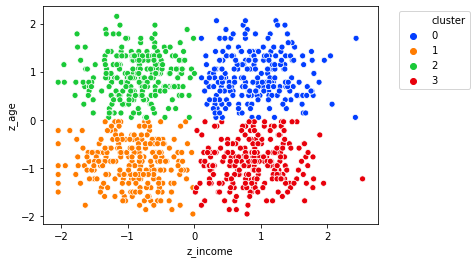

In [183]:
#for colors and palettes
#http://seaborn.pydata.org/tutorial/color_palettes.html

sns.scatterplot(data=data, x='z_income', y='z_age', hue='cluster', palette = 'bright')

#put legend outside

plt.legend(bbox_to_anchor=(1.05,1), loc=2)

We see from the plot above that we have 4 segments of customers:

- young with low income (orange)
- young with high income (red)
- old with low income (green)
- old with high income (blue)

In [186]:
for i in range(10):
    print(10)

10
10
10
10
10
10
10
10
10
10


#### k-means clustering on high-dimensional data

In [188]:
#read the data
data = pd.read_csv('three_col.csv')
data.sample(3)

,income,age,days_since_purchase
373,42835,38,574
907,131581,18,240
565,33195,20,553


In [189]:
# standardize the data
# now that we have more than 2 columns, it will be exhausting to standaradize each 
# column seperately. Technically, we are doing the same task of standardization 3 times
# and if we have 100 columns, then we will need to do it 100 times. 
# For loops help when we are reapting the same compuation multiple times just as we have hear

# save the column names in a variable called col_names so we can loop on
col_names = data.columns

# create a list of the standardized column names
# z_cols = ['z'+col for col in col_names]

for i in col_names:
    data['z_'+i]= (data[i] - data[i].mean())/data[i].std()
    

In [190]:
data.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase
0,56432,31,492,-0.606833,-0.748848,0.818321
1,137580,38,551,1.505879,-0.135469,1.349109
2,68285,59,304,-0.298237,1.704668,-0.873001
3,93617,51,507,0.361289,1.003663,0.953267
4,113441,54,509,0.877413,1.266540,0.971260


In [191]:
# check if we standardize correctly
data.describe()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,79740.087000,39.546000,401.039000,1.598721e-17,5.928591e-17,1.341149e-16
std,38409.400293,11.412192,111.155625,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,18.000000,139.000000,-2.076057e+00,-1.887981e+00,-2.357407e+00
25%,45311.250000,30.000000,299.000000,-8.963649e-01,-8.364738e-01,-9.179832e-01
50%,81676.000000,40.000000,403.000000,5.040206e-02,3.978202e-02,1.764193e-02
75%,113400.500000,50.000000,502.000000,8.763587e-01,9.160379e-01,9.082851e-01
max,168993.000000,65.000000,630.000000,2.323726e+00,2.230422e+00,2.059824e+00


In [193]:
# perform k-means clustering
model = cluster.KMeans(n_clusters = 4, random_state = 10)
#fit the created k-means model to our data

model.fit(data[['z_income','z_age','z_days_since_purchase']])

data['cluster'] = model.labels_

In [194]:
data.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster
0,56432,31,492,-0.606833,-0.748848,0.818321,0
1,137580,38,551,1.505879,-0.135469,1.349109,2
2,68285,59,304,-0.298237,1.704668,-0.873001,1
3,93617,51,507,0.361289,1.003663,0.953267,2
4,113441,54,509,0.877413,1.266540,0.971260,2


In [198]:
# create a PCA object
pca = PCA(n_components = 2)
# use the PCA object to transform the data 

pc = pca.fit_transform(data[['z_income','z_age','z_days_since_purchase']])

pca_data = pd.DataFrame(data=pc,
                       columns = ['PCA1','PCA2'])

pca_data.sample(3)

,PCA1,PCA2
431,1.360129,-1.457167
374,0.718189,1.151979
31,-1.217111,-0.438617


In [199]:
# we can see that both PCAs explain about 68% of the variation in the data
pca.explained_variance_ratio_

array([0.34075065, 0.3359667 ])

In [201]:
# add PCA data to our dataset
data['PCA1'] = pca_data['PCA1']
data['PCA2'] = pca_data['PCA2']
data.sample(3)

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster,PCA1,PCA2
110,117596,55,521,0.985590,1.354166,1.079217,2,-1.471322,-1.222921
83,33725,34,587,-1.198016,-0.485972,1.672979,0,-0.337632,-0.489580
247,41409,26,512,-0.997961,-1.186976,0.998249,0,0.005539,0.413353


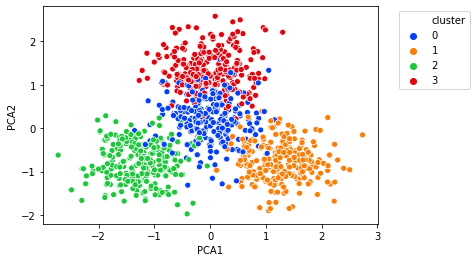

In [202]:
# Visualize 2D Projection

# Stop notebook and create visual inline?
%matplotlib inline

#for colors and palettes
#http://seaborn.pydata.org/tutorial/color_palettes.html
sns.scatterplot(data = data,
x = 'PCA1',
y = 'PCA2',
hue = 'cluster',
palette = 'bright')
# the following line of code puts the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

We can investigate what each cluster seems to be capturing, by looking at the means of each of the variables in each cluster:

In [203]:
data.sample(2)

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster,PCA1,PCA2
72,109587,45,494,0.777073,0.477910,0.836314,2,-1.144848,-0.434634
987,58397,52,351,-0.555674,1.091289,-0.450171,1,0.702014,-1.011498


In [206]:
data[['income','age','days_since_purchase','cluster']].groupby('cluster').mean().astype(int)

,income,age,days_since_purchase
cluster,,,
0,46153,29,498
1,45002,49,299
2,113118,49,502
3,114704,29,302


We see from the plot above that we have 4 segments of customers:

- 0 young with low income, and long time since purchase (red)
- 1 old with low income, and short time since purchase (orange)
- 2 old with high income, and long time since purchase (green)
- 3 young with high income, and short time since purchase (blue)


<IPython.core.display.Javascript object>


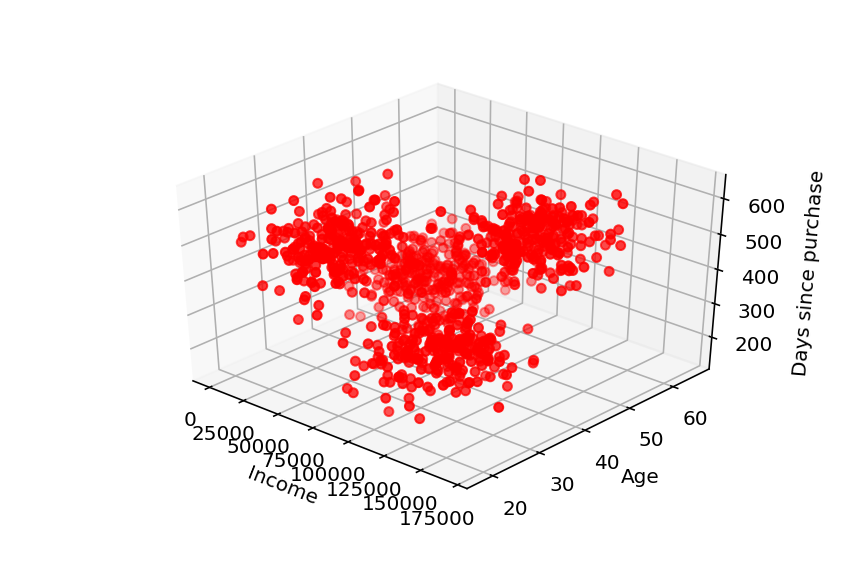

In [208]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['income'],
data['age'],
data['days_since_purchase'],
c='r',
marker='o')
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Days since purchase')
plt.show()

<IPython.core.display.Javascript object>


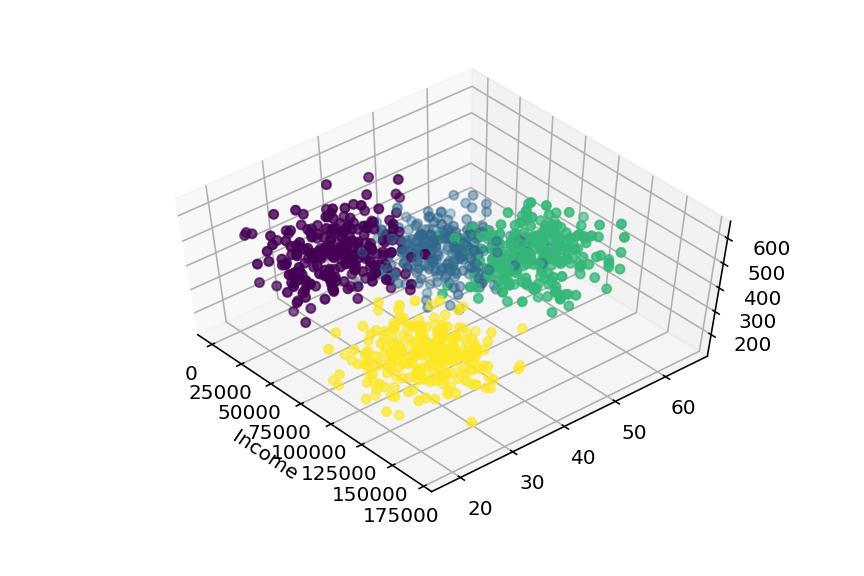

Text(0.5, 0, 'Income')

In [209]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['income'],
data['age'],
data['days_since_purchase'],
c= data['cluster'],
marker='o')
ax.set_xlabel('Income')


In [220]:
data = pd.read_csv('ageinc.csv')
data.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


In [215]:
# standardize the data

data['z_income'] = (data['income'] - data['income'].mean())/data['income'].std()
data['z_age'] = (data['age'] - data['age'].mean())/data['age'].std()

# run k-means clustering

model = cluster.KMeans(n_clusters = 4, random_state = 10)
# fit the created k-means model to our data
data['cluster'] = model.fit_predict(data[['z_income','z_age']])

data.head(2)

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,1


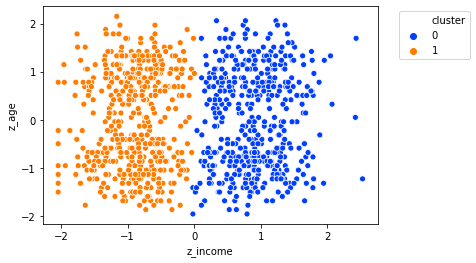

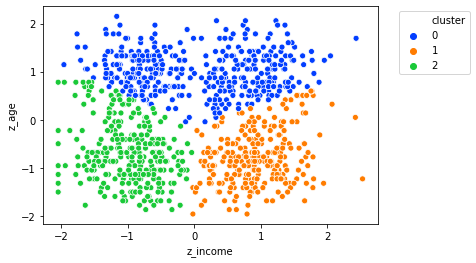

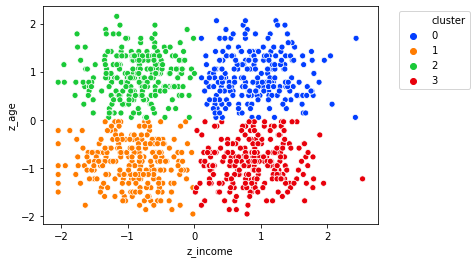

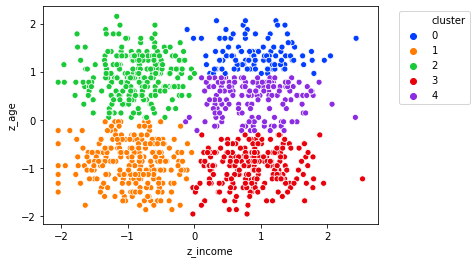

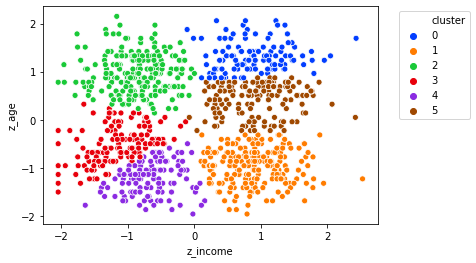

In [218]:
#fig, ax = plt.subplots(2,3, figsize = (10, 5))

%matplotlib inline
for i in range(2, 7):
    plt.figure(i)
    # run k-means clustering
    model = cluster.KMeans(n_clusters = i, random_state = 10)
    21
    # fit the created k-means model to our data
    data['cluster'] = model.fit_predict(data[['z_income', 'z_age']])
    sns.scatterplot(data = data,
    x = 'z_income',
    y = 'z_age',
    hue = 'cluster',
    palette = 'bright')
    # the following line of code puts the legend outside the plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [221]:
data.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


In [222]:
data['z_income'] = (data['income'] - data['income'].mean())/data['income'].std()
data['z_age'] = (data['age'] - data['age'].mean())/data['age'].std()

In [223]:
# We will start with k=2 and compute the Sum of Squares
model = cluster.KMeans(n_clusters =2, random_state = 10)

clusters = model.fit_predict(data[['z_income','z_age']])
data['clusters'] = clusters
centers = model.cluster_centers_

# compute sum of squares
model.inertia_

1189.7476232504305

In [225]:
# now, let's do it for all values of k between 2 and 10
#define an empty list to hold all sum of squares (ss) 
ss = []
for i in range(2,11):
    model = cluster.KMeans(n_clusters =i, random_state = 10)
    clusters = model.fit_predict(data[['z_income','z_age']])
    data['clusters'] = clusters
    ss.append(model.inertia_)
    
print(ss)

[1189.7476232504305, 734.6649696823612, 386.0702389582007, 341.6551178805734, 301.6035411699272, 271.1661846159644, 241.9017991813701, 216.13020539569297, 192.5686871747537]


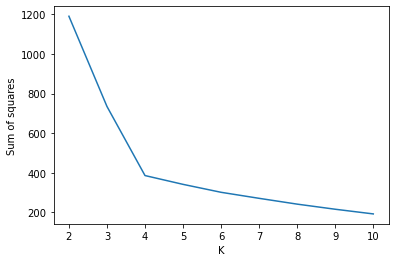

In [227]:
# plot the elbow plot

data = pd.DataFrame({'K':range(2,11), 'Sum of squares':ss})

sns.lineplot(data=data, x='K',y='Sum of squares')

By observing the preceding plot, you will notice that there’s a clear elbow in the plot at k=4, so we take that as our best number for k. Prior to that, an additional cluster gives us big gains in reducing the sum of squared errors. Beyond that, we seem to be getting diminishing returns.

Text(0.5, 1.0, 'Elbow plot')

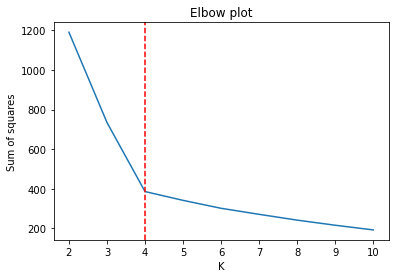

In [229]:
data = pd.DataFrame({'K':range(2,11), 'Sum of squares':ss})

sns.lineplot(data=data, x='K',y='Sum of squares')

plt.axvline(x=4, color='red',linestyle='--')
plt.title('Elbow plot')